In [2]:
# Top mode of infection by state 

Discussion: 

In [72]:
import pandas as pd
import requests
from matplotlib import pyplot as plt
import json
from pprint import pprint

In [73]:
outbreak = pd.read_csv("Cleaned_outbreak_data.csv")
outbreak
outbreak_df = pd.DataFrame(outbreak)
outbreak_df.head()

,Year,Month,State,Primary Mode,Etiology,Etiology Status,Setting,Illnesses,Hospitalizations,Info on Hospitalizations,Deaths,Info on Deaths
0,2020,1,Wisconsin,Person-to-person,Norovirus Genogroup II,Confirmed,Other healthcare facility,6,0.0,6.0,0.0,6
1,2020,1,Nebraska,Person-to-person,Norovirus Genogroup II,Confirmed,Long-term care/nursing home/assisted living fa...,20,1.0,20.0,0.0,20
2,2020,1,New York,Food,Clostridium perfringens,Suspected,Caterer (food prepared off-site from where ser...,7,0.0,7.0,0.0,7
3,2020,1,New Mexico,Person-to-person,Norovirus Genogroup II,Confirmed,Long-term care/nursing home/assisted living fa...,18,0.0,18.0,0.0,18
4,2020,1,Minnesota,Person-to-person,Norovirus unknown,Suspected,Long-term care/nursing home/assisted living fa...,95,1.0,95.0,2.0,95


In [97]:
#value counts of all the primary modes 

primary_modes = outbreak_df["Primary Mode"].value_counts()
primary_modes


Person-to-person                                     1561
Food                                                  630
Indeterminate/Other/Unknown                           221
Water                                                  99
Animal Contact                                         94
Environmental contamination other than food/water       4
Name: Primary Mode, dtype: int64

In [75]:
# Group the DataFrame by year and state, and calculate the value counts of the primary mode column
value_counts_df = outbreak_df.groupby(["Year", "State"])["Primary Mode"].value_counts().reset_index(name="count")
value_counts_df.head()


,Year,State,Primary Mode,count
0,2020,Alabama,Indeterminate/Other/Unknown,9
1,2020,Alabama,Person-to-person,2
2,2020,Arizona,Food,4
3,2020,Arizona,Person-to-person,2
4,2020,Arizona,Animal Contact,1


In [76]:
#top mode of state for whole dataset 
top_modes_by_state = outbreak_df.groupby(["State", "Primary Mode"]).size().reset_index(name='count').sort_values(by='count', ascending=False)
top_modes_by_state

,State,Primary Mode,count
159,Wisconsin,Person-to-person,175
11,Colorado,Person-to-person,153
31,Illinois,Person-to-person,144
59,Massachusetts,Person-to-person,102
69,Minnesota,Person-to-person,91
...,...,...,...
131,Tennessee,Environmental contamination other than food/water,1
42,Kansas,Indeterminate/Other/Unknown,1
134,Tennessee,Water,1
135,Texas,Animal Contact,1


In [77]:
#spliting dataframe by year 2020 and 2021
# creating year variable
year2020 = 2020
year2021 = 2021

In [78]:

# 2020 dataframe 
df_2020 = outbreak_df.loc[outbreak_df['Year'] == year2020]
df_2020.head()

,Year,Month,State,Primary Mode,Etiology,Etiology Status,Setting,Illnesses,Hospitalizations,Info on Hospitalizations,Deaths,Info on Deaths
0,2020,1,Wisconsin,Person-to-person,Norovirus Genogroup II,Confirmed,Other healthcare facility,6,0.0,6.0,0.0,6
1,2020,1,Nebraska,Person-to-person,Norovirus Genogroup II,Confirmed,Long-term care/nursing home/assisted living fa...,20,1.0,20.0,0.0,20
2,2020,1,New York,Food,Clostridium perfringens,Suspected,Caterer (food prepared off-site from where ser...,7,0.0,7.0,0.0,7
3,2020,1,New Mexico,Person-to-person,Norovirus Genogroup II,Confirmed,Long-term care/nursing home/assisted living fa...,18,0.0,18.0,0.0,18
4,2020,1,Minnesota,Person-to-person,Norovirus unknown,Suspected,Long-term care/nursing home/assisted living fa...,95,1.0,95.0,2.0,95


In [79]:
#2021 dataframe 
df_2021 = outbreak_df.loc[outbreak_df["Year"] == year2021]
df_2021.head()


,Year,Month,State,Primary Mode,Etiology,Etiology Status,Setting,Illnesses,Hospitalizations,Info on Hospitalizations,Deaths,Info on Deaths
758,2021,3,Connecticut,Food,Norovirus Genogroup II,Confirmed,Restaurant - Sit-down dining,13,0.0,0.0,0.0,0
924,2021,1,Wisconsin,Water,Pseudomonas aeruginosa,Confirmed,Hotel/Motel/Lodge/Inn,11,0.0,9.0,0.0,11
927,2021,1,Wyoming,Person-to-person,Norovirus Genogroup I; Norovirus Genogroup I; ...,Confirmed; Confirmed; Suspected,Long-term care/nursing home/assisted living fa...,25,0.0,25.0,0.0,25
929,2021,1,Tennessee,Person-to-person,Norovirus unknown,Suspected,Child day care,44,0.0,44.0,0.0,44
930,2021,1,Tennessee,Person-to-person,Norovirus unknown,Suspected,Long-term care/nursing home/assisted living fa...,5,0.0,5.0,0.0,5


# Top Primary MODE by State 

In [80]:
# groupby to find the top primary mode 2020
max_primary_mode_2020 = df_2020.groupby('State')['Primary Mode'].max().reset_index()
 # count of states 
max_primary_mode_2020.count()
# view data
max_primary_mode_2020.head()



,State,Primary Mode
0,Alabama,Person-to-person
1,Arizona,Person-to-person
2,California,Food
3,Colorado,Person-to-person
4,Connecticut,Person-to-person


In [81]:
# groupby to find the top primary mode 2020
max_primary_mode_2021 = df_2021.groupby('State')['Primary Mode'].max().reset_index()
 # count of states 
max_primary_mode_2021.count()
# view
max_primary_mode_2021.head()

,State,Primary Mode
0,Alabama,Person-to-person
1,Alaska,Food
2,Arizona,Person-to-person
3,California,Food
4,Colorado,Person-to-person


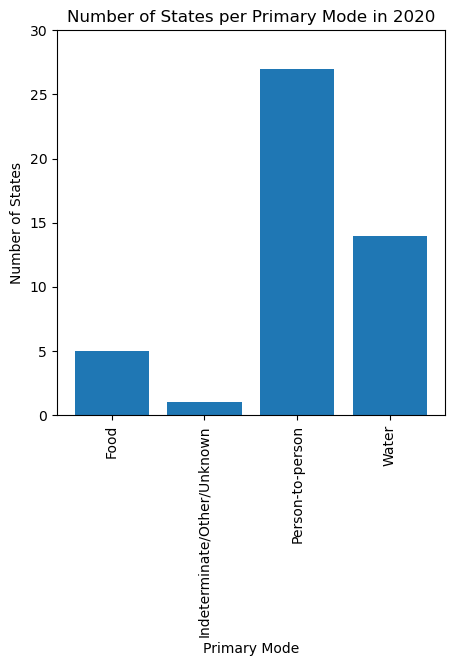

In [91]:
# plot for 2020 primary mode by state
plt.figure(figsize=(5, 5))

# Group the dataframe by 'Primary Mode' and count the unique states
mode_counts_2020 = max_primary_mode_2020.groupby('Primary Mode')['State'].nunique()

# Extract the primary modes and t counts
primary_modes = mode_counts_2020.index
counts = mode_counts_2020.values

# Create the bar graph
plt.bar(primary_modes, counts)

# Customize the plot
plt.title('Number of States per Primary Mode in 2020')
plt.xlabel('Primary Mode')
plt.ylabel('Number of States')
plt.xticks(rotation= 90)
plt.ylim(0, 30)

# save plot
plt.savefig("TS_Figures/2020_primary_mode_by_state_bar.png")

# Display the plot
plt.show()



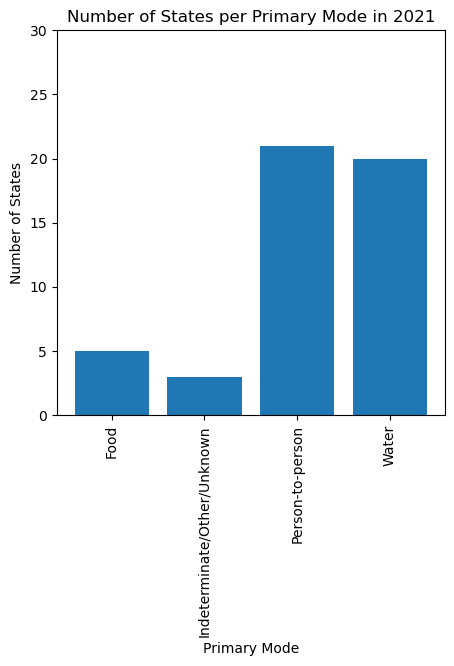

In [92]:
#plot for top primary mode by state
plt.figure(figsize=(5, 5))

# Group the dataframe by 'Primary Mode' and count the unique states
mode_counts_2021 = max_primary_mode_2021.groupby('Primary Mode')['State'].nunique()

# Extract the primary modes and counts
primary_modes = mode_counts_2021.index
counts = mode_counts_2021.values

# Create the bar graph
plt.bar(primary_modes, counts)

# Customize the plot
plt.title('Number of States per Primary Mode in 2021')
plt.xlabel('Primary Mode')
plt.ylabel('Number of States')
plt.xticks(rotation= 90)
plt.ylim(0, 30)

# save plot
plt.savefig("TS_Figures/2021_primary_mode_by_state_bar.png")
# Display the plot
plt.show()



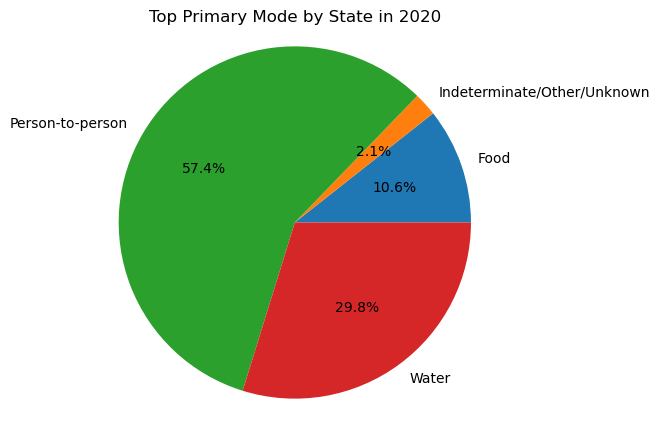

In [84]:
# pie chart
# Group the dataframe by 'Primary Mode' and count the unique states
mode_counts_2020 = max_primary_mode_2020.groupby('Primary Mode')['State'].nunique()

# Extract the primary modes and counts
primary_modes = mode_counts_2020.index
counts = mode_counts_2020.values

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=primary_modes, autopct='%1.1f%%')

# Customize the plot
plt.title('Top Primary Mode by State in 2020')
plt.axis('equal')

# save plot
plt.savefig("TS_Figures/2020_primary_mode_by_state_pie.png")

# Display the plot
plt.show()



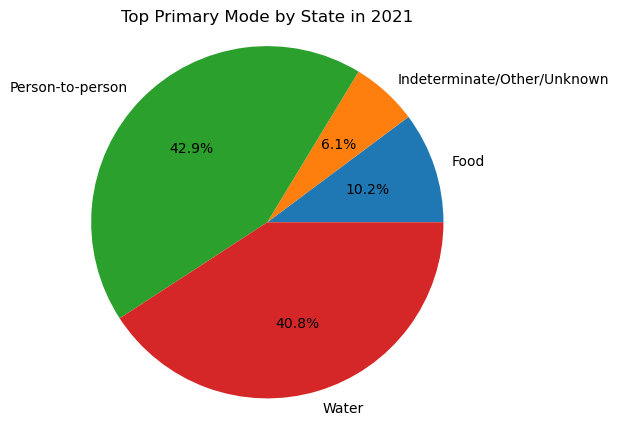

In [85]:
# pie chart
# Group the dataframe by 'Primary Mode' and count the unique states
mode_counts_2021 = max_primary_mode_2021.groupby('Primary Mode')['State'].nunique()

# Extract the primary modes and counts
primary_modes = mode_counts_2021.index
counts = mode_counts_2021.values

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=primary_modes, autopct='%1.1f%%')

# Customize the plot
plt.title('Top Primary Mode by State in 2021')
plt.axis('equal')

# save plot
plt.savefig("TS_Figures/2021_primary_mode_by_state_pie.png")
# Display the plot
plt.show()


In [86]:
#value_counts_2020_df = df_2020.groupby(["State","Primary Mode"])["Primary Mode"].value_counts().reset_index(name = "count")
#alue_counts_2020_df

# Primary mode of outbreak in Wisconsin for both 2020 and 2021 


In [87]:
#group by for state = Wisconsin in 2020
value_counts_2020_df = df_2020.groupby(["State"])["Primary Mode"].value_counts().reset_index(name="count")
value_counts_2020_df
wi_2020 = value_counts_2020_df[value_counts_2020_df['State'] == "Wisconsin"]
print(wi_2020)                          

         State                 Primary Mode  count
122  Wisconsin             Person-to-person    116
123  Wisconsin                         Food      9
124  Wisconsin                        Water      4
125  Wisconsin  Indeterminate/Other/Unknown      2


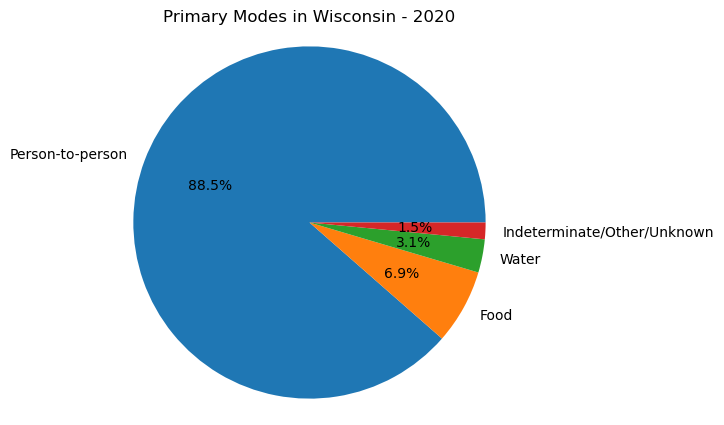

In [88]:
# pie plot for Primary Modes for outbreak in Wisconsin for 2020
# Extract the primary modes and counts for Wisconsin in 2020
primary_modes = wi_2020['Primary Mode']
counts = wi_2020['count']

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=primary_modes, autopct='%1.1f%%')

# Customize the plot
plt.title('Primary Modes in Wisconsin - 2020')
plt.axis('equal')

# save plot
plt.savefig("TS_Figures/2020_primary_mode_wi_pie.png")
# Display the plot
plt.show()

In [89]:
#group by for state = Wisconsin in 2021
value_counts_2021_df = df_2021.groupby(["State"])["Primary Mode"].value_counts().reset_index(name="count")
value_counts_2021_df
wi_2021 = value_counts_2021_df[value_counts_2021_df['State'] == "Wisconsin"]
print(wi_2021) 

         State                 Primary Mode  count
139  Wisconsin             Person-to-person     59
140  Wisconsin                         Food     10
141  Wisconsin  Indeterminate/Other/Unknown      6
142  Wisconsin                        Water      5
143  Wisconsin               Animal Contact      1


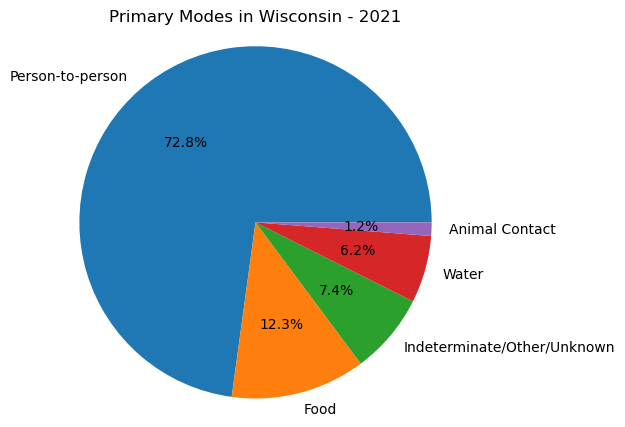

In [94]:
# pie plot for Primary Modes for outbreak in Wisconsin for 2021
# Extract the primary modes and counts for Wisconsin in 2021
primary_modes_wi2021 = wi_2021['Primary Mode']
counts_wi2021 = wi_2021['count']

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(counts_wi2021, labels=primary_modes_wi2021, autopct='%1.1f%%')

# Customize the plot
plt.title('Primary Modes in Wisconsin - 2021')
plt.axis('equal')

# save plot
plt.savefig("TS_Figures/2021_primary_mode_wi_pie.png")
# Display the plot
plt.show()

#Statistical analysis
Question: Are the top primary modes for state siginfigantly different from 2020 to 2021?

In [ ]:
stats.ttest_ind(df_2020, df_2021, equal_var=False)